In [64]:
import pandas as pd
DATA_PATH = f"data/EURUSD_1m.csv"
df = pd.read_csv(DATA_PATH)
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

In [65]:
df.head()
print(len(df))
df = df.dropna()
print(len(df))

5039
5039


In [66]:
from indicators.ema_crossover import ema_crossover

In [67]:
df = ema_crossover(df, 9, 21)

In [68]:
print(len(df))

5039


In [69]:
df.head()

,timestamp,open,high,low,close,ema_fast,ema_slow,ema_cross,ema_signal
0,2025-04-15 23:00:00+00:00,1.129305,1.129305,1.129305,1.129305,NaN,NaN,0,0.0
1,2025-04-15 23:01:00+00:00,1.129305,1.129305,1.129305,1.129305,NaN,NaN,0,0.0
2,2025-04-15 23:02:00+00:00,1.129178,1.129178,1.129178,1.129178,NaN,NaN,0,0.0
3,2025-04-15 23:03:00+00:00,1.129433,1.129433,1.129433,1.129433,NaN,NaN,0,0.0
4,2025-04-15 23:04:00+00:00,1.129433,1.129433,1.129433,1.129433,NaN,NaN,0,0.0


In [70]:
df.tail()

,timestamp,open,high,low,close,ema_fast,ema_slow,ema_cross,ema_signal
5034,2025-04-21 12:53:00+00:00,1.154335,1.154335,1.154335,1.154335,1.153932,1.153735,1,0.0
5035,2025-04-21 12:54:00+00:00,1.153802,1.153802,1.153802,1.153802,1.153906,1.153741,1,0.0
5036,2025-04-21 12:55:00+00:00,1.154201,1.154201,1.154201,1.154201,1.153965,1.153783,1,0.0
5037,2025-04-21 12:56:00+00:00,1.154335,1.154335,1.154335,1.154335,1.154039,1.153833,1,0.0
5038,2025-04-21 12:57:00+00:00,1.154201,1.154201,1.154201,1.154201,1.154072,1.153867,1,0.0


In [57]:
from models.feature_engineering import generate_features
df = generate_features(df)

In [58]:
df.head()

,timestamp,open,high,low,close,ema_fast,ema_slow,ema_cross,ema_signal,return_1,return_3,macd,rsi,boll_upper,boll_lower
19,2025-04-15 23:19:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129183,1.129170,0,0.0,0.0,0.000000,0.000013,49.130234,1.129595,1.128723
20,2025-04-15 23:20:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129181,1.129171,0,0.0,0.0,0.000113,0.000010,49.130234,1.129584,1.128721
21,2025-04-15 23:21:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129180,1.129172,0,0.0,0.0,0.000000,0.000009,49.130234,1.129572,1.128720
22,2025-04-15 23:22:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129180,1.129172,0,0.0,0.0,0.000000,0.000007,49.130234,1.129572,1.128720
23,2025-04-15 23:23:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129179,1.129173,0,0.0,0.0,0.000000,0.000006,49.130234,1.129539,1.128728


In [62]:
print(len(df))

5020


In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [60]:
df['target'] = (df['close'].shift(-3) > df['close']).astype(int)


In [61]:
df.head()

,timestamp,open,high,low,close,ema_fast,ema_slow,ema_cross,ema_signal,return_1,return_3,macd,rsi,boll_upper,boll_lower,target
19,2025-04-15 23:19:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129183,1.129170,0,0.0,0.0,0.000000,0.000013,49.130234,1.129595,1.128723,0
20,2025-04-15 23:20:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129181,1.129171,0,0.0,0.0,0.000113,0.000010,49.130234,1.129584,1.128721,0
21,2025-04-15 23:21:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129180,1.129172,0,0.0,0.0,0.000000,0.000009,49.130234,1.129572,1.128720,0
22,2025-04-15 23:22:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129180,1.129172,0,0.0,0.0,0.000000,0.000007,49.130234,1.129572,1.128720,0
23,2025-04-15 23:23:00+00:00,1.129178,1.129178,1.129178,1.129178,1.129179,1.129173,0,0.0,0.0,0.000000,0.000006,49.130234,1.129539,1.128728,0


In [3]:
import requests
import pandas as pd
from datetime import datetime

# === CONFIG ===
API_KEY = "850f1623977b408baa58cfb49af39cee"
BASE_URL = "https://api.twelvedata.com/time_series"

In [17]:
def fetch_data(pair="EUR/USD", interval="1min", limit=100):
    #symbol = pair.replace("/", "")  # Twelve Data uses EURUSD format
    params = {
        "symbol": pair,
        "interval": interval,
        "outputsize": limit,
        "apikey": API_KEY,
        "format": "JSON"
    }

    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if "values" not in data:
        raise ValueError(f"Error fetching data: {data.get('message', 'No data returned')}")

    df = pd.DataFrame(data["values"])
    df = df.rename(columns={"datetime": "timestamp"})
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values("timestamp")



    return df

In [18]:
df = fetch_data("BTC/USD", "1min", 100)

In [19]:
df.head

<bound method NDFrame.head of              timestamp      open      high       low     close
99 2025-04-20 14:53:00  84584.88     84650  84584.88  84647.62
98 2025-04-20 14:54:00  84647.62  84647.62  84619.82  84622.76
97 2025-04-20 14:55:00  84622.75  84645.72  84616.83  84645.72
96 2025-04-20 14:56:00  84645.72  84649.99  84637.45  84647.02
95 2025-04-20 14:57:00  84641.14  84646.99  84633.83  84635.37
..                 ...       ...       ...       ...       ...
4  2025-04-20 16:28:00  84545.14  84553.29  84532.14  84537.72
3  2025-04-20 16:29:00  84537.72  84537.72  84532.14  84535.33
2  2025-04-20 16:30:00  84535.33  84544.58  84493.74  84493.74
1  2025-04-20 16:31:00  84494.11  84513.41   84485.7  84511.66
0  2025-04-20 16:32:00  84511.57  84511.57   84496.8  84506.46

[100 rows x 5 columns]>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

📈 Raw data preview:


Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,0
2023-01-03,1.067771,1.068262,1.052155,1.067771,0
2023-01-04,1.054685,1.063151,1.054596,1.054685,0
2023-01-05,1.060637,1.063264,1.051558,1.060637,0
2023-01-06,1.052222,1.062225,1.048526,1.052222,0



✅ Basic Data Checks:
- Data shape: (521, 5)
- Null values:
Price   Ticker  
Close   EURUSD=X    0
High    EURUSD=X    0
Low     EURUSD=X    0
Open    EURUSD=X    0
Volume  EURUSD=X    0
dtype: int64
- Date range: 2023-01-02 to 2024-12-30
- Columns: [('Close', 'EURUSD=X'), ('High', 'EURUSD=X'), ('Low', 'EURUSD=X'), ('Open', 'EURUSD=X'), ('Volume', 'EURUSD=X')]


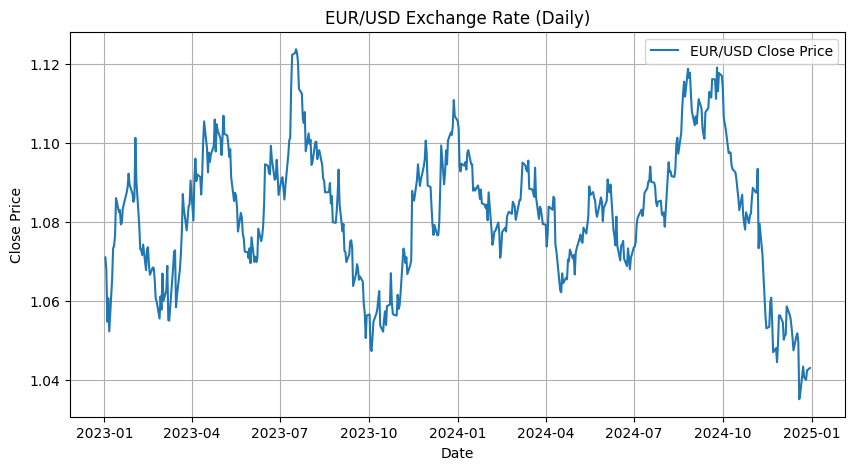

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch EUR/USD data using the EURUSD=X ticker
ticker = 'EURUSD=X'
data = yf.download(ticker, start='2023-01-01', end='2024-12-31', interval='1d')

# Step 2: Basic preview
print("📈 Raw data preview:")
display(data.head())

# Step 3: Basic sanity checks
print("\n✅ Basic Data Checks:")
print(f"- Data shape: {data.shape}")
print(f"- Null values:\n{data.isnull().sum()}")
print(f"- Date range: {data.index.min().date()} to {data.index.max().date()}")
print(f"- Columns: {list(data.columns)}")

# Step 4: Visual inspection
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='EUR/USD Close Price')
plt.title('EUR/USD Exchange Rate (Daily)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

📈 Raw data preview:


,Price,Timestamp
Datetime,,
2025-04-17 00:00:00+01:00,1.140251,2025-04-17 00:00:00+01:00
2025-04-17 00:01:00+01:00,1.140251,2025-04-17 00:01:00+01:00
2025-04-17 00:02:00+01:00,1.139991,2025-04-17 00:02:00+01:00
2025-04-17 00:03:00+01:00,1.140121,2025-04-17 00:03:00+01:00
2025-04-17 00:04:00+01:00,1.140251,2025-04-17 00:04:00+01:00



✅ Basic Data Checks:
- Data shape: (3398, 2)
- Null values:
Price        0
Timestamp    0
dtype: int64
- Date range: 2025-04-17 to 2025-04-21
- Columns: ['Price', 'Timestamp']


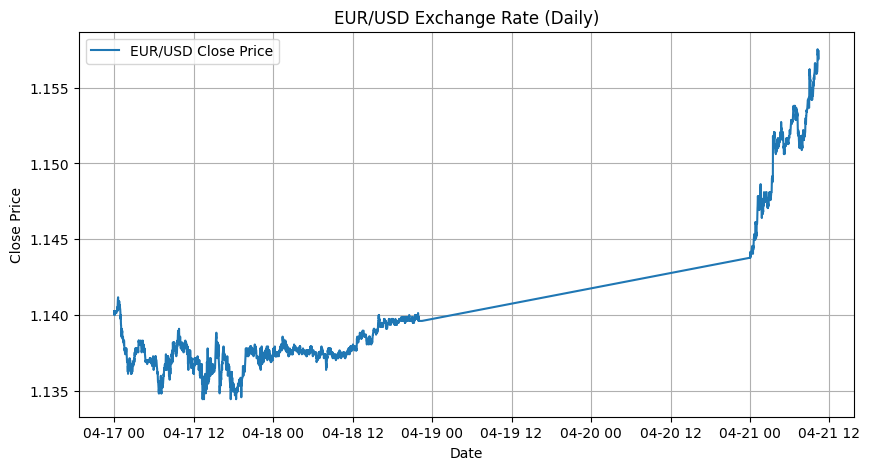

In [9]:
import yfinance as yf
pair = "EURUSD=X"

# Load data using Ticker().history() for clean output
ticker = yf.Ticker(pair)
data = ticker.history(interval="1m", period="3d")
data = data[["Close"]].rename(columns={"Close": "Price"})
data.dropna(inplace=True)
data["Timestamp"] = data.index

# Step 2: Basic preview
print("📈 Raw data preview:")
display(data.head())

# Step 3: Basic sanity checks
print("\n✅ Basic Data Checks:")
print(f"- Data shape: {data.shape}")
print(f"- Null values:\n{data.isnull().sum()}")
print(f"- Date range: {data.index.min().date()} to {data.index.max().date()}")
print(f"- Columns: {list(data.columns)}")

# Step 4: Visual inspection
plt.figure(figsize=(10, 5))
plt.plot(data['Price'], label='EUR/USD Close Price')
plt.title('EUR/USD Exchange Rate (Daily)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
data

,Price,Timestamp
Datetime,,
2025-04-16 00:00:00+01:00,1.129305,2025-04-16 00:00:00+01:00
2025-04-16 00:01:00+01:00,1.129305,2025-04-16 00:01:00+01:00
2025-04-16 00:02:00+01:00,1.129178,2025-04-16 00:02:00+01:00
2025-04-16 00:03:00+01:00,1.129433,2025-04-16 00:03:00+01:00
2025-04-16 00:04:00+01:00,1.129433,2025-04-16 00:04:00+01:00
...,...,...
2025-04-21 10:15:00+01:00,1.157274,2025-04-21 10:15:00+01:00
2025-04-21 10:16:00+01:00,1.157274,2025-04-21 10:16:00+01:00
2025-04-21 10:17:00+01:00,1.157140,2025-04-21 10:17:00+01:00


In [22]:
import yfinance as yf
pair = "EURUSD=X"

# Load data using Ticker().history() for clean output
ticker = yf.Ticker(pair)
data = ticker.history(interval="1m", period="3d")


# Step 2: Basic preview
print("📈 Raw data preview:")
display(data.head())

# Step 3: Basic sanity checks
print("\n✅ Basic Data Checks:")
print(f"- Data shape: {data.shape}")
print(f"- Null values:\n{data.isnull().sum()}")
print(f"- Date range: {data.index.min().date()} to {data.index.max().date()}")
print(f"- Columns: {list(data.columns)}")

print(f"- Volume: {data["Volume"].min()} to {data["Volume"].max()}")

📈 Raw data preview:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-04-17 00:00:00+01:00,1.140251,1.140251,1.140251,1.140251,0,0.0,0.0
2025-04-17 00:01:00+01:00,1.140251,1.140251,1.140251,1.140251,0,0.0,0.0
2025-04-17 00:02:00+01:00,1.139991,1.139991,1.139991,1.139991,0,0.0,0.0
2025-04-17 00:03:00+01:00,1.140121,1.140121,1.140121,1.140121,0,0.0,0.0
2025-04-17 00:04:00+01:00,1.140251,1.140251,1.140251,1.140251,0,0.0,0.0



✅ Basic Data Checks:
- Data shape: (3414, 7)
- Null values:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
- Date range: 2025-04-17 to 2025-04-21
- Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
- Volume: 0 to 0


In [34]:
import pandas as pd
import argparse
import os
import yfinance as yf


def fetch_data(pair="EURUSD", interval="1m", period="1d"):
    pair = f"{pair}=X"
    ticker = yf.Ticker(pair)
    df = ticker.history(interval=interval, period=period)
    
    # Check if the DataFrame is empty
    if df.empty:
        raise ValueError(f"No data returned for {pair} with interval '{interval}' and period '{period}'")

    print(df.tail())
    # Convert index to UTC and drop timezone
    df.index = df.index.tz_convert("UTC").tz_localize(None)

    # Keep only price columns
    df = df[["Open", "High", "Low", "Close"]]

    # Lowercase column names
    df.columns = [col.lower() for col in df.columns]

    # Rename index to 'timestamp' and reset it to be a column
    df.index.name = "timestamp"
    df = df.reset_index()
    print(df.tail())

    
    filename = f"data/{symbol}_{interval}.csv"
    df.to_csv(filename, index=False)
    print(f"✅ Saved: {filename}")

    return df

# === Example Usage with Arguments ===
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Fetch Twelve Data OHLCV data and save as CSV.')
    parser.add_argument('--pair', type=str, default='EURUSD', help='e.g. BTCUSD, ETHUSD')
    parser.add_argument('--timeframe', type=str, default='1m', help='e.g. 1m, 5m, 1h, 1d')
    parser.add_argument('--period', type=int, default=100, help='Number of candles to fetch')
    args = parser.parse_args()

    fetch_data(pair=args.pair, interval=args.timeframe, period=args.limit)










fetch_data("EURUSD", "1m", "1d")



                               Open      High       Low     Close  Volume  \
Datetime                                                                    
2025-04-21 10:56:00+01:00  1.155135  1.155135  1.155135  1.155135       0   
2025-04-21 10:57:00+01:00  1.155135  1.155135  1.155135  1.155135       0   
2025-04-21 10:58:00+01:00  1.155001  1.155001  1.155001  1.155001       0   
2025-04-21 10:59:00+01:00  1.155135  1.155135  1.155135  1.155135       0   
2025-04-21 11:00:00+01:00  1.154734  1.154734  1.154734  1.154734       0   

                           Dividends  Stock Splits  
Datetime                                            
2025-04-21 10:56:00+01:00        0.0           0.0  
2025-04-21 10:57:00+01:00        0.0           0.0  
2025-04-21 10:58:00+01:00        0.0           0.0  
2025-04-21 10:59:00+01:00        0.0           0.0  
2025-04-21 11:00:00+01:00        0.0           0.0  
              timestamp      open      high       low     close
655 2025-04-21 09:56:00  

,timestamp,open,high,low,close
0,2025-04-20 23:00:00,1.143772,1.143772,1.143772,1.143772
1,2025-04-20 23:01:00,1.143903,1.143903,1.143903,1.143903
2,2025-04-20 23:02:00,1.143772,1.143772,1.143772,1.143772
3,2025-04-20 23:03:00,1.143772,1.143772,1.143772,1.143772
4,2025-04-20 23:04:00,1.144165,1.144165,1.144165,1.144165
...,...,...,...,...,...
655,2025-04-21 09:56:00,1.155135,1.155135,1.155135,1.155135
656,2025-04-21 09:57:00,1.155135,1.155135,1.155135,1.155135
657,2025-04-21 09:58:00,1.155001,1.155001,1.155001,1.155001
658,2025-04-21 09:59:00,1.155135,1.155135,1.155135,1.155135


In [ ]:
# fetch_data.py — Pull OHLCV data from Twelve Data and save to CSV

import requests
import pandas as pd
from datetime import datetime
import argparse
from dotenv import load_dotenv
import os
load_dotenv(override=True)


# === CONFIG ===
API_KEY = os.getenv('TD_API_KEY')
BASE_URL = "https://api.twelvedata.com/time_series"

# === FUNCTION ===
def fetch_data(pair="EUR/USD", interval="1min", limit=100):
    #symbol = pair.replace("/", "")  # Twelve Data uses EURUSD format
    params = {
        "symbol": pair,
        "interval": interval,
        "outputsize": limit,
        "apikey": API_KEY,
        "format": "JSON"
    }

    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if "values" not in data:
        raise ValueError(f"Error fetching data: {data.get('message', 'No data returned')}")

    df = pd.DataFrame(data["values"])
    df = df.rename(columns={"datetime": "timestamp"})
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values("timestamp")

    # Convert numeric columns
    for col in ["open", "high", "low", "close"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    symbol = pair.replace("/", "")
    filename = f"data/{symbol}_{interval}.csv"
    df.to_csv(filename, index=False)
    print(f"✅ Saved: {filename}")



    return df

# === Example Usage with Arguments ===
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Fetch Twelve Data OHLCV data and save as CSV.')
    parser.add_argument('--pair', type=str, default='EUR/USD', help='e.g. BTC/USD, ETH/USD')
    parser.add_argument('--timeframe', type=str, default='1min', help='e.g. 1min, 5min, 1h, 1day')
    parser.add_argument('--limit', type=int, default=100, help='Number of candles to fetch')
    args = parser.parse_args()

    fetch_data(pair=args.pair, interval=args.timeframe, limit=args.limit)
